# <center> Bài tập Thực hành môn Nhập môn Máy học </center>


### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    - 3. a. Use elbow method as baseline
    - 3. b. Apply other methods to compare with elbow
4. Use Pipeline
    - 4. a. Use scaler and dimensional reduction (if it is necessary).
    - 4. b. Use suitable clustering model for this problem. 
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

# Load Dataset

### Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from pyod.models.iforest import IForest
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA

### Load dataframe

In [2]:
df = pd.read_csv("Clustered_Customer_Data.csv")

In [3]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [4]:
df.drop(df.columns[0], axis=1, inplace= True)

In [5]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


# Data Analysis

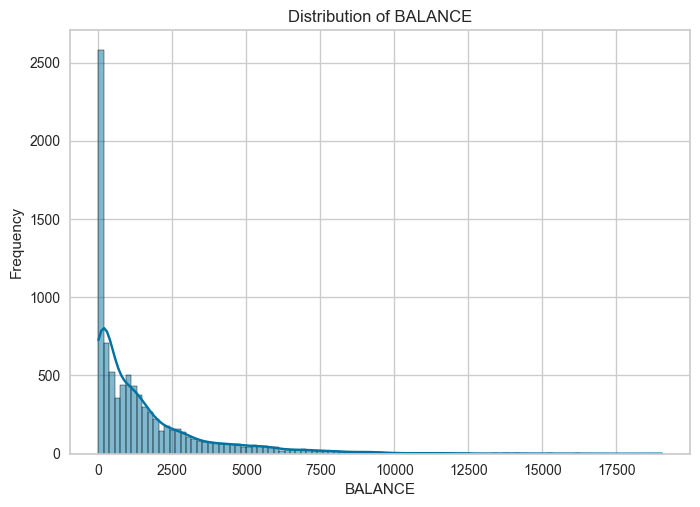

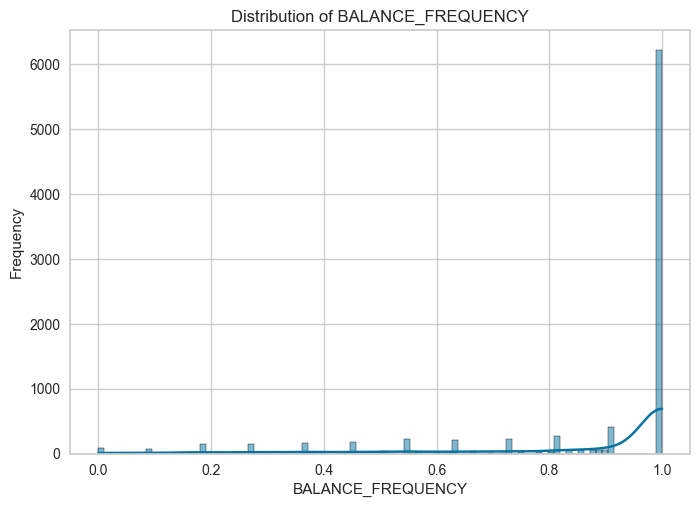

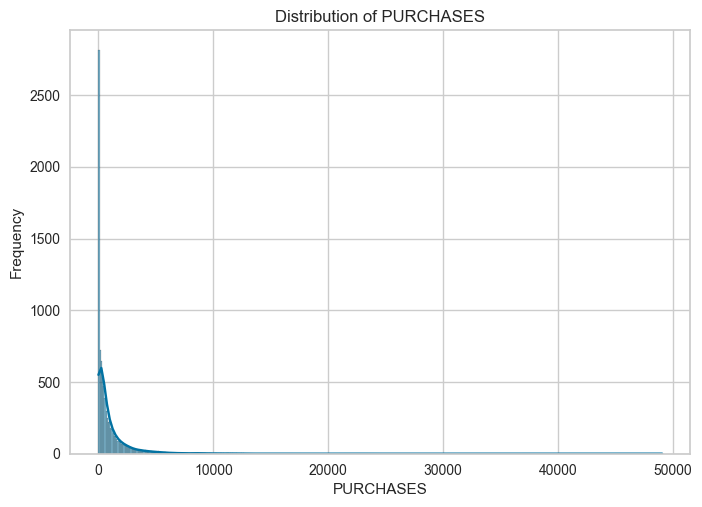

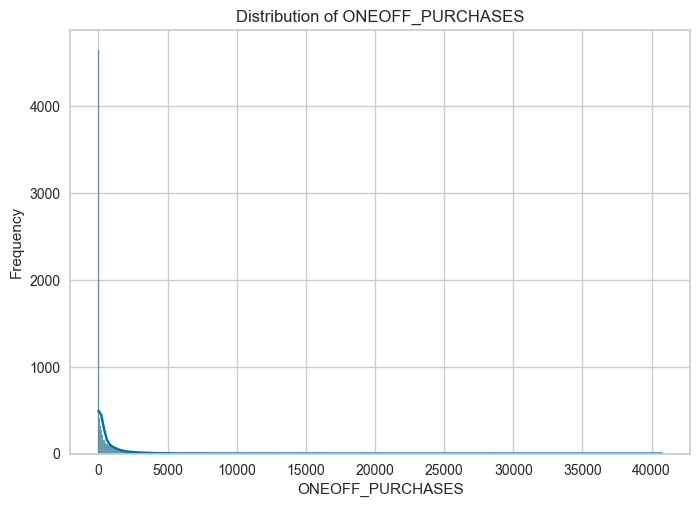

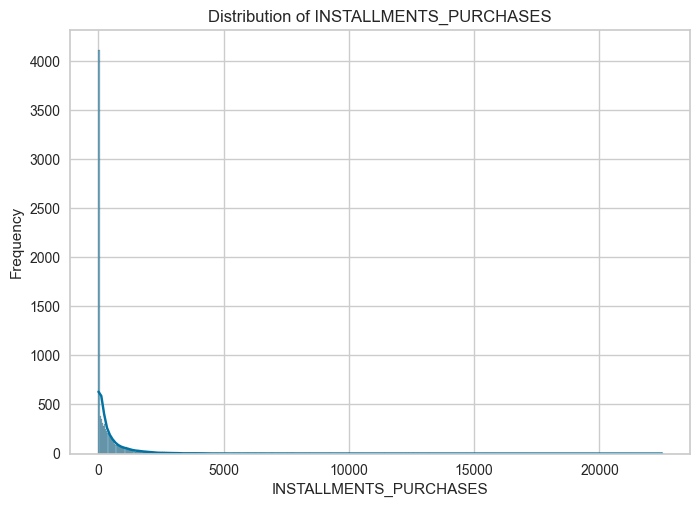

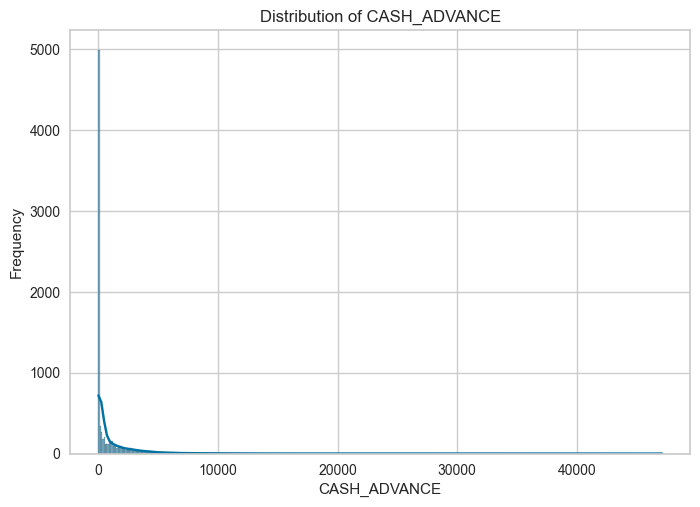

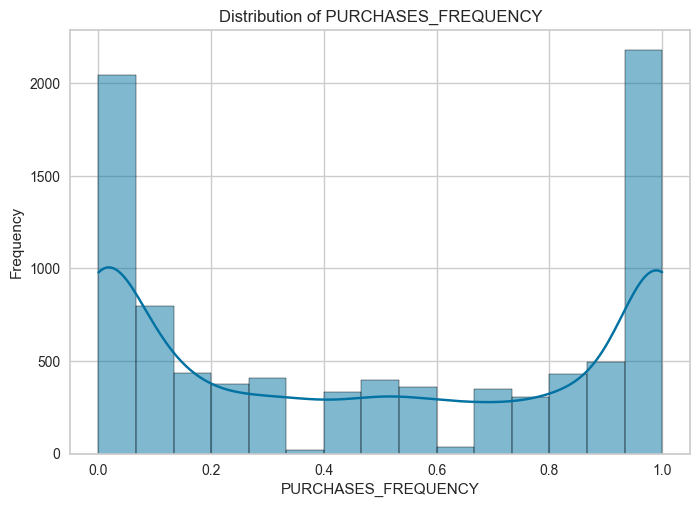

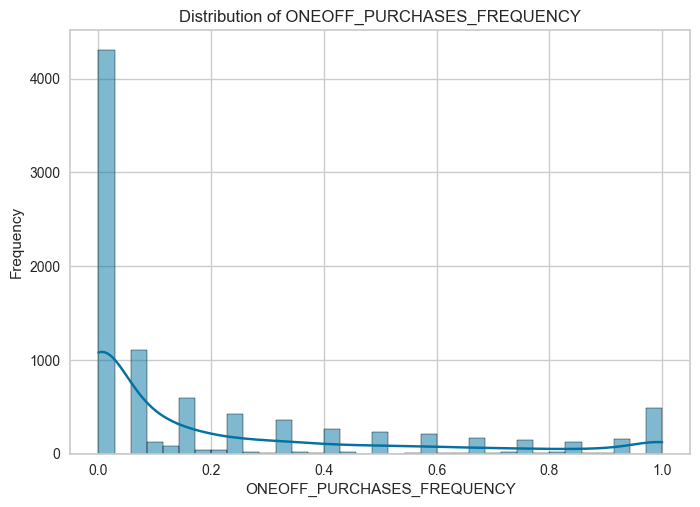

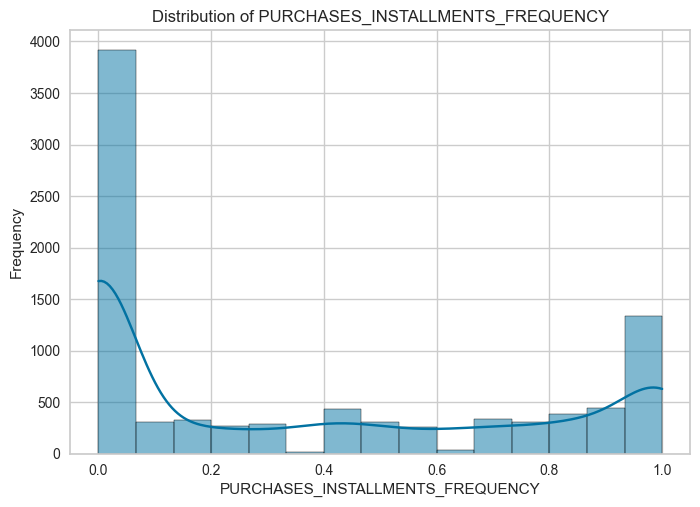

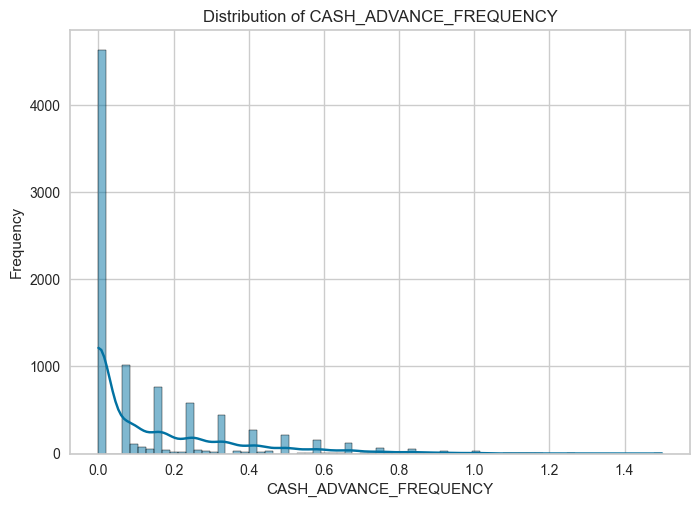

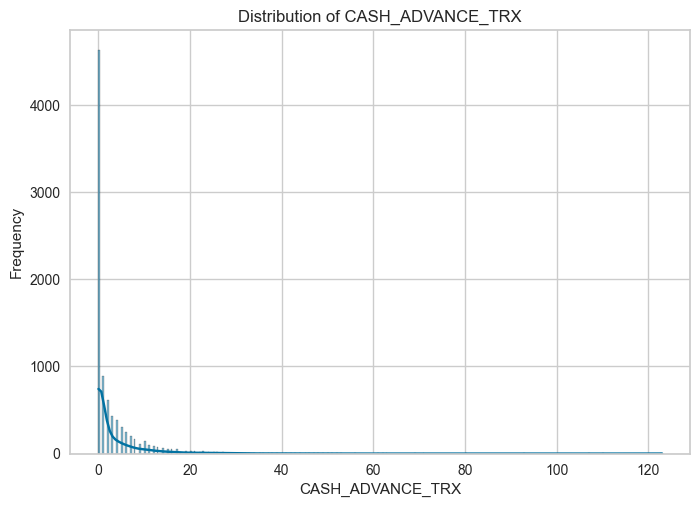

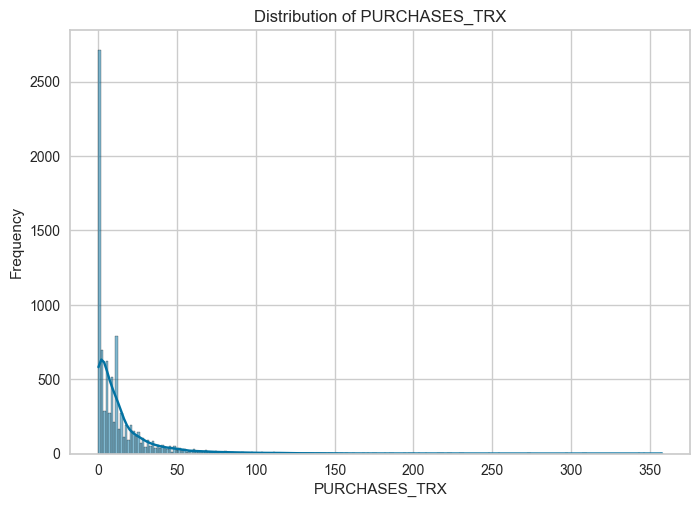

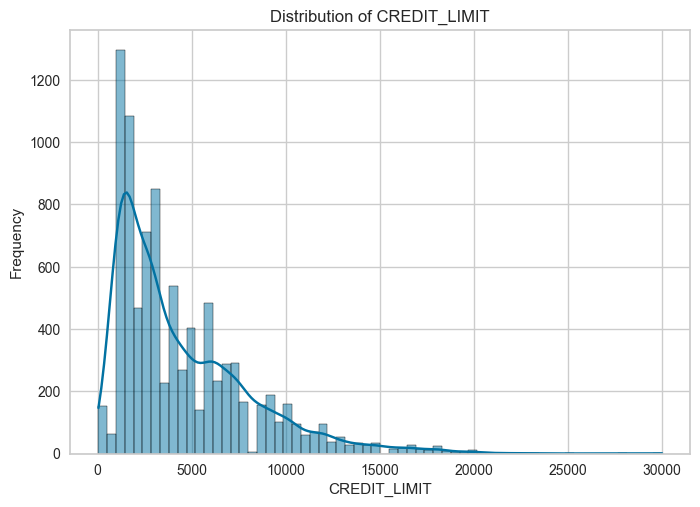

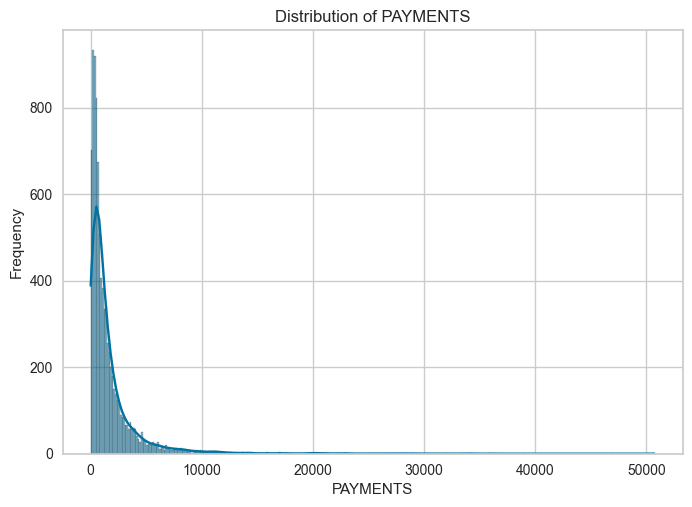

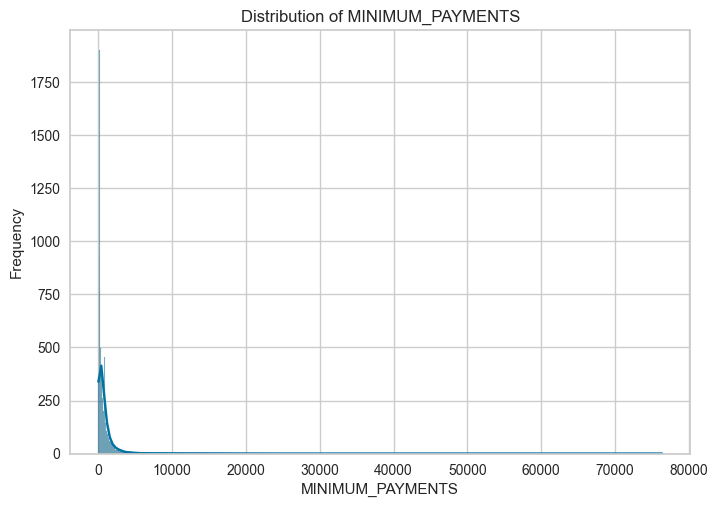

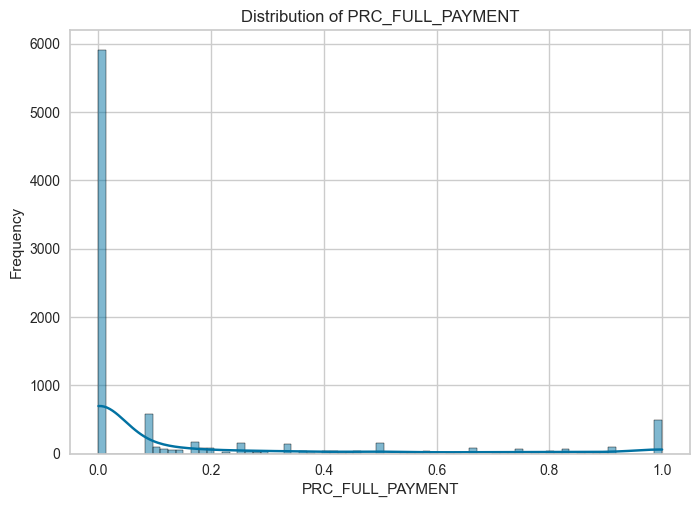

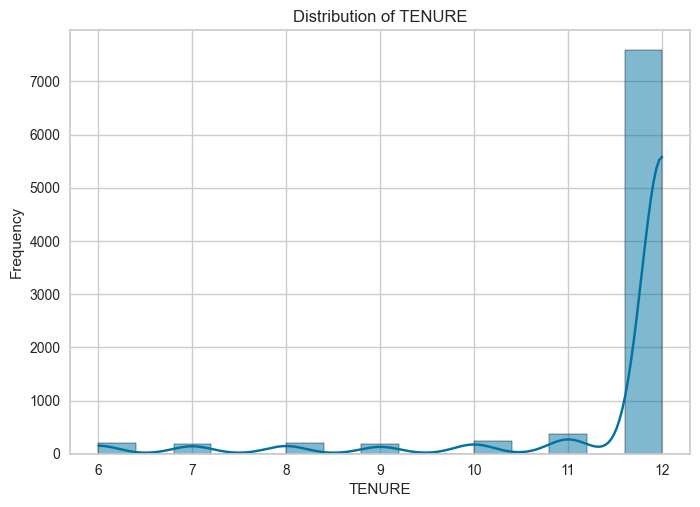

In [8]:
for col in df.columns.drop(['Cluster']):
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='count', ylabel='Cluster'>

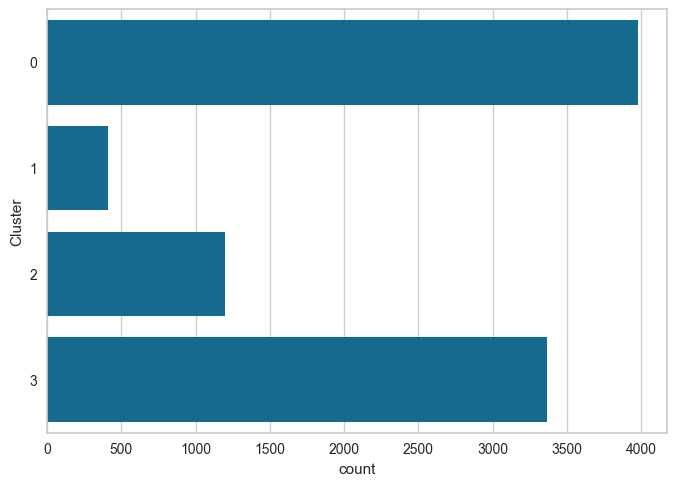

In [9]:
sns.countplot(y='Cluster', data=df)

# Data Preprocessing

In [10]:
df_preprocessing = df.copy()

In [11]:
df_preprocessing.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [12]:
# Nhận thấy có hơn 800 outliers nhưng việc loại bỏ outliers làm cho mô hình phân cụm đạt hiệu suất không cao, ARI ~ 0.6

# clf = IForest(contamination=0.1)
# clf.fit(df_preprocessing.values)

# outliers = clf.predict(df_preprocessing.values)
# df_preprocessing['Outlier'] = outliers

# df_no_outliers = df_preprocessing[df_preprocessing['Outlier'] == 0].drop(columns=['Outlier'])

# df_no_outliers = df_no_outliers.reset_index(drop=True)

# df_no_outliers

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_preprocessing.drop(['Cluster'], axis=1))
df_preprocessing = pd.DataFrame(scaled_data)

In [14]:
df_preprocessing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


# Feature Engineering

In [15]:
df_feature_engineering = df_preprocessing.copy()
df_feature_engineering['Cluster'] = df['Cluster']

In [16]:
df_feature_engineering.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,2
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,3
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,0


<Axes: >

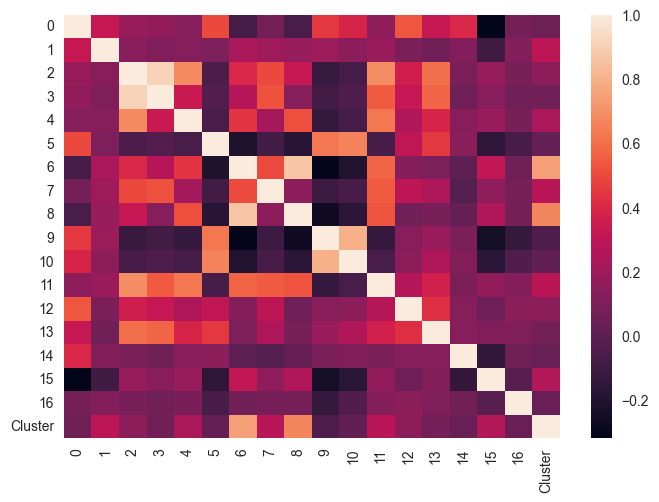

In [17]:
sns.heatmap(df_feature_engineering.corr())

<Axes: >

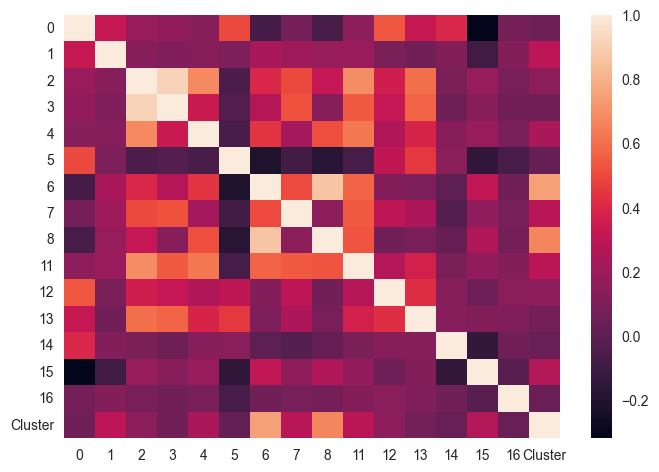

In [18]:
# Nhận thấy cột 5, 9 và 10 tương đối giống nhau nhưng khi loại bỏ thì hiệu suất mang lại lại thấp hơn
df_feature_engineering.drop(df_feature_engineering.columns[[9, 10]], axis=1, inplace=True)
sns.heatmap(df_feature_engineering.corr())

# Model Part

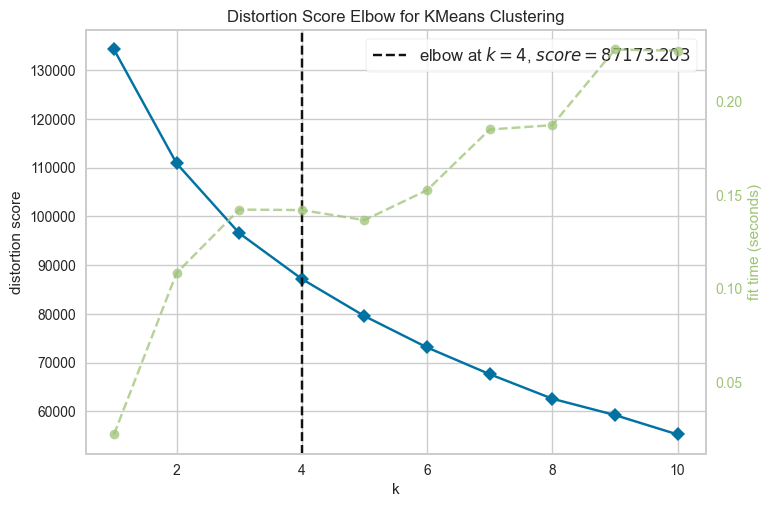

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
elbow_method = KElbowVisualizer(KMeans(n_init=20), k=(1,11))

elbow_method.fit(df_feature_engineering.drop(['Cluster'], axis=1))
elbow_method.show()

In [20]:
def prepare_X_y(df):

    X = df.drop('Cluster', axis=1, inplace=False).values

    y = df['Cluster'].values
    return X, y.ravel()

X, y = prepare_X_y(df_feature_engineering)

In [21]:
# Áp dụng KMeans clustering
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)

# Gán nhãn từ KMeans cho các điểm dữ liệu
labels = kmeans.labels_
labels

# # So sánh nhãn KMeans với nhãn thật
ari_score = adjusted_rand_score(y, labels)
nmi_score = normalized_mutual_info_score(y, labels)

print("Adjusted Rand Index (ARI):", ari_score)
print("Normalized Mutual Information (NMI):", nmi_score)

Adjusted Rand Index (ARI): 0.8430635290119298
Normalized Mutual Information (NMI): 0.7727126864009816


# Discussion & Conclusion

### Choose n components for PCA

In [22]:
pca = PCA(n_components=len(df_feature_engineering.columns))
pca.fit(df_feature_engineering.values)

PCA(n_components=16)

In [23]:
pca.explained_variance_ratio_*100

array([3.04260744e+01, 1.65533811e+01, 1.16860839e+01, 7.07871459e+00,
       6.33056042e+00, 5.74628515e+00, 4.64259237e+00, 4.21512025e+00,
       3.79775633e+00, 2.94343484e+00, 2.02161687e+00, 1.74555066e+00,
       1.31436247e+00, 1.23735045e+00, 2.61047232e-01, 6.89674444e-05])

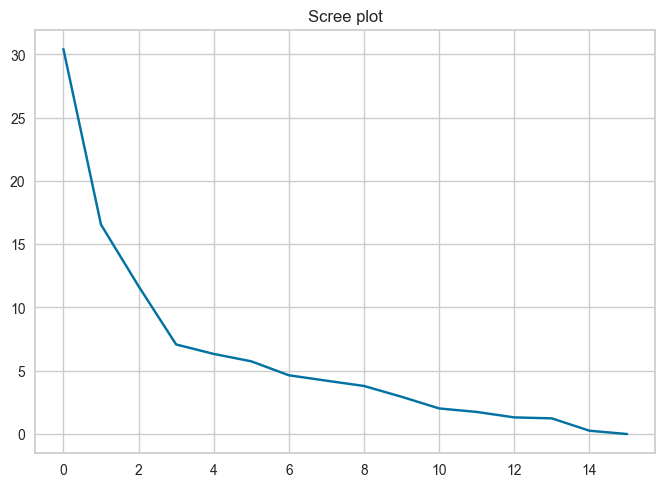

In [24]:
plt.plot(range(16),pca.explained_variance_ratio_*100)
plt.title("Scree plot")
plt.show()

### PCA with 3 components

In [25]:
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(df_feature_engineering.values), columns=["pca_1", "pca_2", "pca_3"])

pca_df.head()

,pca_1,pca_2,pca_3
0,-2.250310,-0.052865,0.954826
1,-0.823723,1.731552,-1.980229
2,1.446868,-0.396541,-0.765376
3,-1.568849,1.319585,1.013921
4,-2.173116,0.316103,0.603346


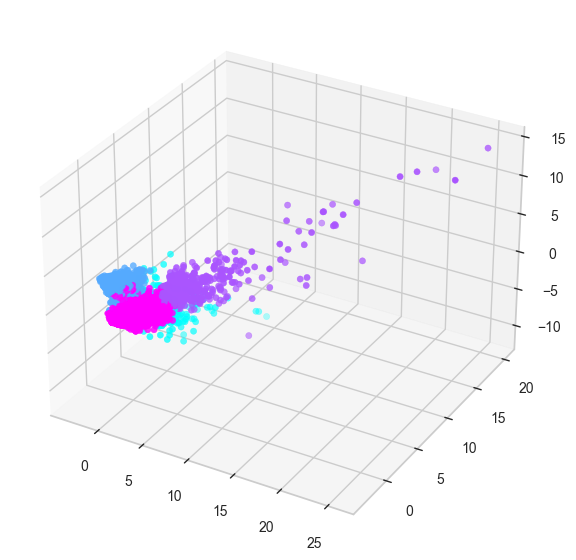

In [26]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=kmeans.labels_, cmap="cool")
plt.show()

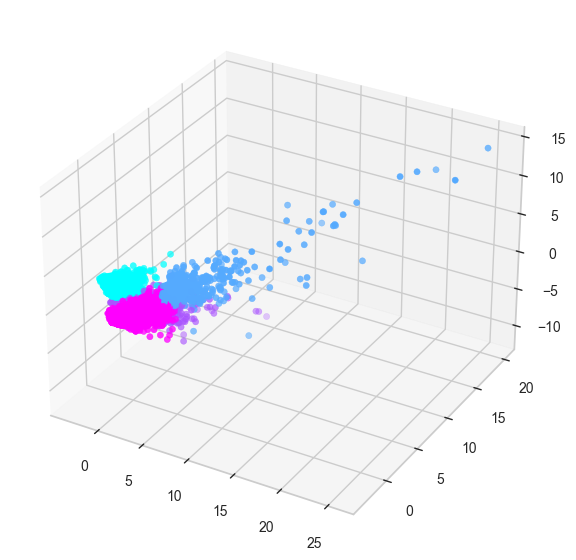

In [27]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=df['Cluster'], cmap="cool")
plt.show()

### PCA with 2 components

In [28]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(df_feature_engineering.values), columns=["pca1", "pca2"])

pca_df.head()

,pca1,pca2
0,-2.250311,-0.052863
1,-0.823717,1.731564
2,1.446871,-0.396553
3,-1.568853,1.319596
4,-2.173114,0.316101


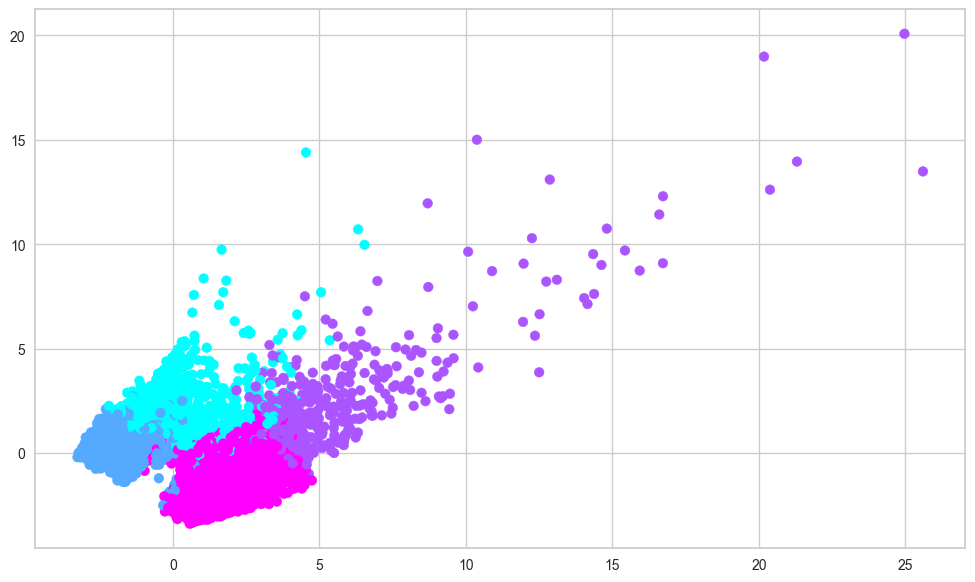

In [29]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df.pca1, pca_df.pca2, c=kmeans.labels_, cmap="cool")
plt.show()

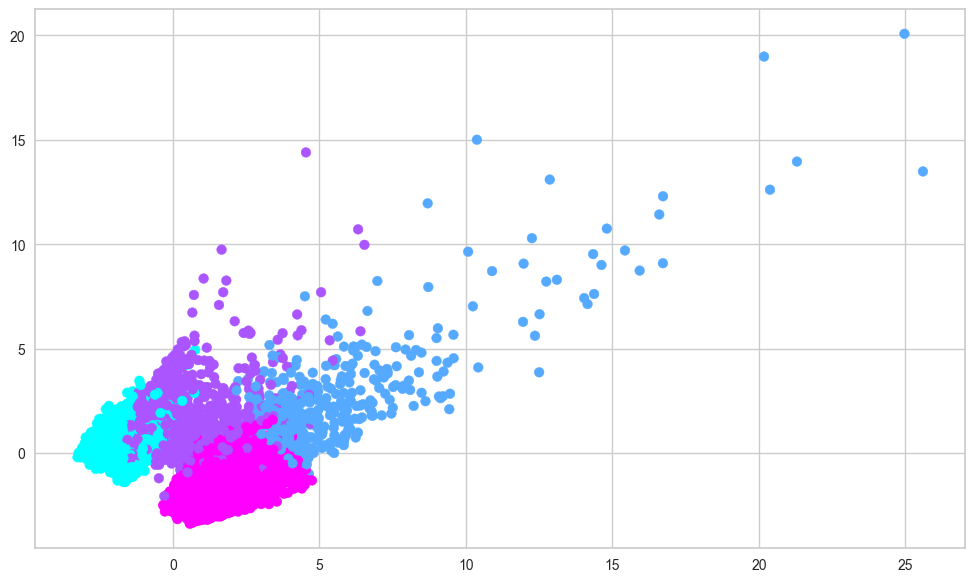

In [30]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df.pca1, pca_df.pca2, c=df['Cluster'], cmap="cool")
plt.show()

### Conclusion

#### **Adjusted Rand Index (ARI): 0.8430635290119298**
- This ARI score is very high, indicating a strong similarity between the predicted clusters and the true clusters. The model's clustering performance is excellent.

#### **Normalized Mutual Information (NMI): 0.7727126864009816**
- The NMI score is also high, demonstrating that the model captures a substantial amount of information about the true cluster structure. The model's clustering quality is very good.

#### **Summary:**
- Both ARI and NMI scores are high, reflecting that the KMeans model has performed very well in clustering the data accurately and capturing the underlying structure. The model's clustering results are reliable and effective for further analysis.